In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fule_com = pd.read_csv("Original_2000_2014_Fuel_Consumption_Ratings.csv")
fule_com.sample(3)

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
10636,2011,KIA,BORREGO,SUV,4.6,8,AS6,X,13.7,9.2,11.7,24,269
4603,2005,SAAB,9-5 AERO TURBO,MID-SIZE,2.3,4,AS5,Z,12.0,7.6,10.0,28,230
9041,2010,BMW,128i COUPE,SUBCOMPACT,3.0,6,M6,Z,10.8,6.9,9.0,31,207


In [3]:
fule_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MODEL_YEAR                      14343 non-null  int64  
 1   MAKE                            14343 non-null  object 
 2   MODEL                           14343 non-null  object 
 3   VEHICLE_CLASS                   14343 non-null  object 
 4   ENGINE_SIZE(L)                  14343 non-null  float64
 5   CYLINDERS                       14343 non-null  int64  
 6   TRANSMISSION                    14343 non-null  object 
 7   FUEL_TYPE                       14343 non-null  object 
 8   FUEL_CONSUMPTION_CITY(L/100km)  14343 non-null  float64
 9   HWY_(L/100km)                   14343 non-null  float64
 10  COMB_(L/100km)                  14343 non-null  float64
 11  COMB_(mpg)                      14343 non-null  int64  
 12  CO2_EMISSIONS(g/km)             

In [4]:
print("Unique values of each columns")
for column in fule_com.columns:
    print(f"{column} = {len(fule_com[column].unique())}")

Unique values of each columns
MODEL_YEAR = 15
MAKE = 51
MODEL = 2536
VEHICLE_CLASS = 17
ENGINE_SIZE(L) = 62
CYLINDERS = 9
TRANSMISSION = 24
FUEL_TYPE = 5
FUEL_CONSUMPTION_CITY(L/100km) = 214
HWY_(L/100km) = 142
COMB_(L/100km) = 185
COMB_(mpg) = 58
CO2_EMISSIONS(g/km) = 246


In [5]:
# the function to_frame() change the series into dataframe 
df_plot = fule_com["MAKE"].value_counts().head(10).copy().to_frame().reset_index()
df_plot.columns = ["Brand", "count"]
df_plot

,Brand,count
0,CHEVROLET,1464
1,FORD,1009
2,GMC,963
3,BMW,899
4,MERCEDES-BENZ,758
5,DODGE,675
6,TOYOTA,620
7,VOLKSWAGEN,560
8,AUDI,502
9,PORSCHE,500


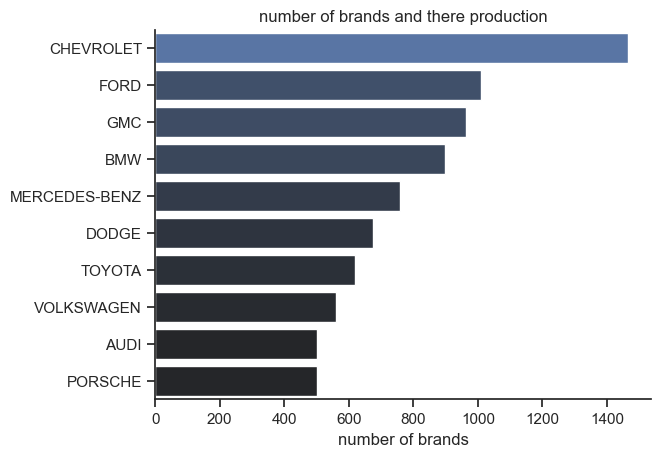

In [6]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot,x="count",y="Brand",hue="count",palette="dark:b",legend=False)
sns.despine() # used to remove the border of plot
plt.title("number of brands and there production")
plt.xlabel("number of brands")
plt.ylabel("")
plt.show()

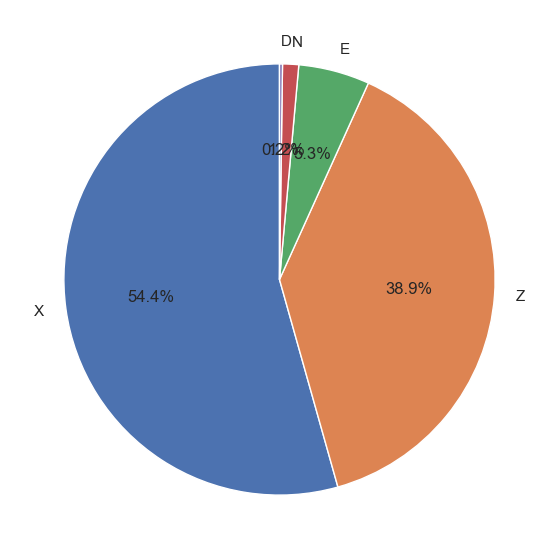

In [7]:
plt.figure(figsize=(13,7))
plt.pie(fule_com["FUEL_TYPE"].value_counts(),labels=fule_com["FUEL_TYPE"].unique().tolist(),autopct="%1.1f%%",startangle=90)
plt.show()

In [8]:
fule_make_count = fule_com.groupby(["MAKE","MODEL"]).size()
fule_make_count

MAKE   MODEL            
ACURA  1.6EL                 2
       1.7EL                10
       3.2CL                 4
       3.2TL                 6
       3.5RL                 5
                            ..
VOLVO  XC90 3.2              6
       XC90 3.2 AWD          6
       XC90 AWD              2
       XC90 T6 AWD TURBO     3
       XC90 V8 AWD           6
Length: 2541, dtype: int64

In [9]:
fule_make_count = fule_make_count.reset_index(name="model_count")
fule_make_count

,MAKE,MODEL,model_count
0,ACURA,1.6EL,2
1,ACURA,1.7EL,10
2,ACURA,3.2CL,4
3,ACURA,3.2TL,6
4,ACURA,3.5RL,5
...,...,...,...
2536,VOLVO,XC90 3.2,6
2537,VOLVO,XC90 3.2 AWD,6
2538,VOLVO,XC90 AWD,2
2539,VOLVO,XC90 T6 AWD TURBO,3


In [10]:
fule_make_count.sort_values(by="model_count",ascending=False,inplace=True)
fule_make_count

,MAKE,MODEL,model_count
2404,VOLKSWAGEN,JETTA,74
869,FORD,MUSTANG,70
875,FORD,RANGER,61
818,FORD,F150,56
1911,NISSAN,SENTRA,52
...,...,...,...
1983,PORSCHE,911 GT2RS,1
1202,JAGUAR,VANDEN PLAS SUPERCHARGED,1
1986,PORSCHE,911 GT3RS,1
1987,PORSCHE,911 GT3RS 4.0,1


In [11]:
make_titles=fule_make_count["MAKE"].unique().tolist()[:3]
make_titles

['VOLKSWAGEN', 'FORD', 'NISSAN']

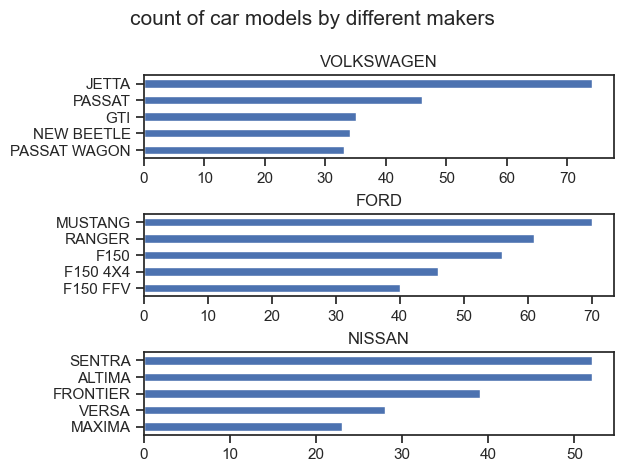

In [12]:
fig, ax = plt.subplots(len(make_titles),1)
# fig.figure(figsize=(13,7))

for i, make_titles_array in enumerate(make_titles):
    df_plot = fule_make_count[fule_make_count["MAKE"]==make_titles_array].head(5)
    df_plot.plot(kind="barh",x="MODEL",y="model_count",ax=ax[i],title=make_titles_array)
    
    ax[i].invert_yaxis() #this is used to invert the y axis

    ax[i].set_ylabel('') #this will remove the y labels

    ax[i].legend().set_visible(False) # hide the lagends

    fig.suptitle("count of car models by different makers",fontsize=15)
    fig.tight_layout(h_pad=0.5)  # used to fix the overlap
plt.show()

In [13]:
df_plot

,MAKE,MODEL,model_count
1911,NISSAN,SENTRA,52
1882,NISSAN,ALTIMA,52
1888,NISSAN,FRONTIER,39
1915,NISSAN,VERSA,28
1899,NISSAN,MAXIMA,23


In [14]:
df_plot["model_count"].sum()

194

In [15]:
52/194*100

26.804123711340207

In [16]:
df_plot["model_count"].apply(lambda x:(x/df_plot["model_count"].sum())*100)

1911    26.804124
1882    26.804124
1888    20.103093
1915    14.432990
1899    11.855670
Name: model_count, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


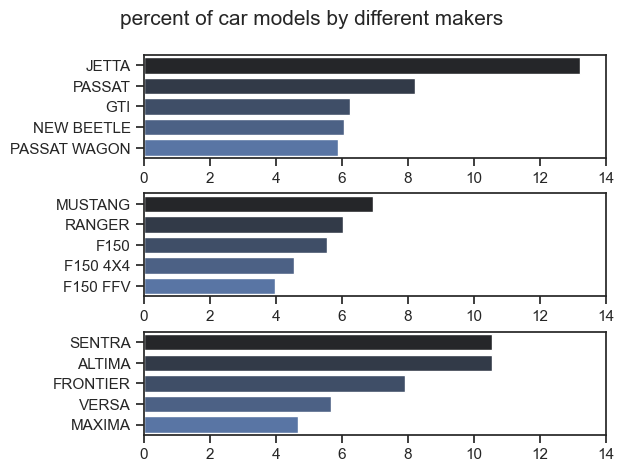

In [17]:
fig, ax = plt.subplots(len(make_titles),1)
# fig.figure(figsize=(13,7))

for i, make_titles_array in enumerate(make_titles):
    df_plot = fule_make_count[fule_make_count["MAKE"]==make_titles_array].copy()
    df_plot["percent"]=df_plot["model_count"].apply(lambda x:(x/df_plot["model_count"].sum())*100)
    df_plot=df_plot.head(5)
    sns.barplot(data=df_plot,y="MODEL",x="percent",ax=ax[i],hue="MODEL",palette="dark:b")

    ax[i].set_ylabel('') 
    ax[i].set_xlabel('') 
    ax[i].legend().set_visible(False) # hide the lagend
    ax[i].set_xlim(0,14)

    fig.suptitle("percent of car models by different makers",fontsize=15)
    fig.tight_layout(h_pad=0.5)  # used to fix the overlap
plt.show()